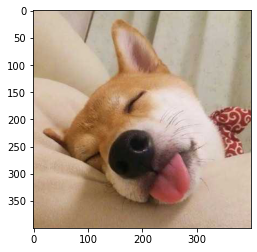

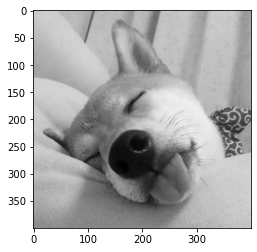

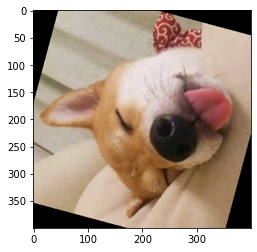

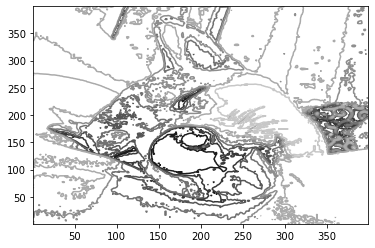

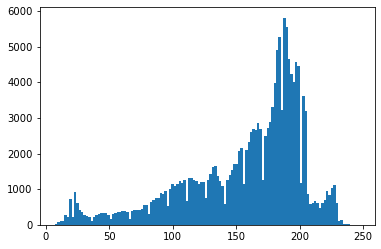

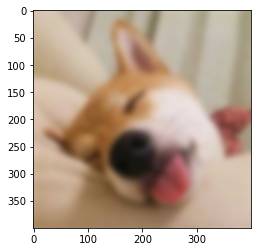

In [67]:
import numpy as np
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
    
img= Image.open("./2_dog.jpg")

#原图
plt.imshow(img)
plt.show()
#灰度
plt.imshow(img.convert('L'))
plt.show
#旋转
plt.show()
plt.imshow(img.rotate(75))
plt.show()
#轮廓图
gray_img=np.array(img.convert('L'))
plt.contour(gray_img, origin='image')
plt.show()
#直方图
plt.hist(gray_img.flatten(),128)
plt.show()

#高斯模糊(可自定模糊半径)
class MyBlur(ImageFilter.Filter):
    name="GaussianBlur"
    def __init__(self, radius=2,bounds=None):
        self.radius=radius
        self.bounds=bounds
    def filter(self,image):
        if self.bounds:
            clips=image.crop(self.bounds).gaussian_blur(self.radius)
            image.paste(clips,self.bounds)
            return image
        else:
            return image.gaussian_blur(self.radius)
        
img_blur=img.filter(MyBlur(radius=5))
plt.imshow(img_blur)
plt.show()


In [64]:
from IPython.display import display
import pandas as pd
data=pd.read_csv('./2_movie_metadata.csv')
#打印前五行
display(data.head())
#条件过滤
display(data[data['duration']<100])
#规范化数据
data= pd.read_csv('./2_movie_metadata.csv',dtype={'title_year':str})
#删除缺失的行
data=data.dropna()
#必要变换 大写、删除额外空格
data['movie_title']=data['movie_title'].str.upper()
for index in data.columns:
    if (data[index].dtype =='str'):
        data[index] = data[index].str.strip()

#保存
data.to_csv('./cleandata.csv',encoding='utf-8')





color                     director_name  num_critic_for_reviews  duration  \
0  Color                     James Cameron                   723.0     178.0   
1  Color        Gore Verbinski                               302.0     169.0   
2  Color                        Sam Mendes                   602.0     148.0   
3  Color                 Christopher Nolan                   813.0     164.0   
4    NaN                       Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

      actor_1_name                                        movie_title  \
0      CCH Pounder                                            Avatar    
1      Johnny Depp          Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                           Spectre    
3        Tom Hardy                             The Dark Knight Rises    
4      Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0           886204                       4834             Wes Studi   
1           471220                      48350        Jack Davenport   
2           275868                      11700      Stephanie Sigman   
3          1144337                     106759  Joseph Gordon-Levitt   
4                8                        143                   NaN   

   facenumber_in_poster                                      plot_keywords  \
0                   0.0             avatar|future|marine|native|paraplegic   
1                   0.0  goddess|marriage ceremony|marriage proposal|pi...   
2                   1.0                bomb|espionage|sequel|spy|terrorist   
3                   0.0  deception|imprisonment|lawlessness|police offi...   
4                   0.0                                                NaN   

                                     movie_imdb_link  num_user_for_reviews  \
0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...                3054.0   
1  http://www.imdb.com/title/tt0449088/?ref_=fn_t...                1238.0   
2  http://www.imdb.com/title/tt2379713/?ref_=fn_t...                 994.0   
3  http://www.imdb.com/title/tt1345836/?ref_=fn_t...                2701.0   
4  http://www.imdb.com/title/tt5289954/?ref_=fn_t...                   NaN   

  language country content_rating       budget  title_year  \
0  English     USA          PG-13  237000000.0      2009.0   
1  English     USA          PG-13  300000000.0      2007.0   
2  English      UK          PG-13  245000000.0      2015.0   
3  English     USA          PG-13  250000000.0      2012.0   
4      NaN     NaN            NaN          NaN         NaN   

   actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
0                   936.0         7.9          1.78                 33000  
1                  5000.0         7.1          2.35                     0  
2                   393.0         6.8          2.35                 85000  
3                 23000.0         8.5          2.35                164000  
4                    12.0         7.1           NaN                     0

color              director_name  num_critic_for_reviews  \
55               Color                 Peter Sohn                   298.0   
56               Color               Mark Andrews                   488.0   
58               Color             Andrew Stanton                   421.0   
59               Color               Brett Ratner                   162.0   
61               Color            Robert Zemeckis                   240.0   
67               Color                Pete Docter                   408.0   
68               Color              Rob Letterman                   219.0   
74               Color                Tom Shadyac                   186.0   
78               Color                Pete Docter                   536.0   
82               Color           Robert Stromberg                   401.0   
87               Color              Mike Mitchell                   226.0   
93               Color               Dean DeBlois                   288.0   
105              Color          Wolfgang Petersen                   231.0   
107              Color               Chris Miller                   227.0   
121              Color               Eric Darnell                   167.0   
131              Color               Byron Howard                   225.0   
132              Color               Hoyt Yeatman                   145.0   
133              Color         Jonathan Liebesman                   310.0   
138              Color              Steve Hickner                   194.0   
139              Color        Jennifer Yuh Nelson                   284.0   
143              Color                Simon Wells                   132.0   
144              Color               David Bowers                   135.0   
146              Color                Rob Minkoff                   196.0   
148              Color               Eric Darnell                   211.0   
152              Color           Barry Sonnenfeld                   208.0   
154              Color         Alessandro Carloni                   210.0   
156              Color               Peter Ramsey                   256.0   
157              Color               Dean Parisot                   135.0   
177              Color                        NaN                    21.0   
180              Color                David Soren                   166.0   
182              Color               Eric Darnell                   153.0   
184              Color               Mark Osborne                   266.0   
188              Color                Tim Johnson                   165.0   
191              Color               Chris Miller                   246.0   
198              Color              Eric Leighton                   145.0   
200              Color                 Shawn Levy                   154.0   
201              Color                Tom McGrath                   233.0   
203              Color           Robert Schwentke                   208.0   
222              Color                  Tim Story                   262.0   
228              Color                Rob Minkoff                    71.0   
238              Color                Pete Docter                   250.0   
241              Color              Kirk De Micco                   257.0   
246              Color             Alfonso Cuarón                   738.0   
258              Color              Rob Letterman                   184.0   
260              Color                        NaN                    29.0   
263              Color                  Will Finn                   104.0   
273              Color                   Bo Welch                   109.0   
276              Color                Rob Minkoff                   101.0   
277              Color               Ron Clements                   228.0   
279                NaN        Christopher Barnard                     NaN   
293              Color                 Paul Weitz                   180.0   
297          